mackwell_1998_maryland_diabase
perple_x/output/mackwell_1998_maryland_diabase/mackwell_1998_maryland_diabase_1.txt
hacker_2015_md_xenolith
perple_x/output/hacker_2015_md_xenolith/hacker_2015_md_xenolith_1.txt
sammon_2021_lower_crust
perple_x/output/sammon_2021_lower_crust/sammon_2021_lower_crust_1.txt
sammon_2021_deep_crust
perple_x/output/sammon_2021_deep_crust/sammon_2021_deep_crust_1.txt


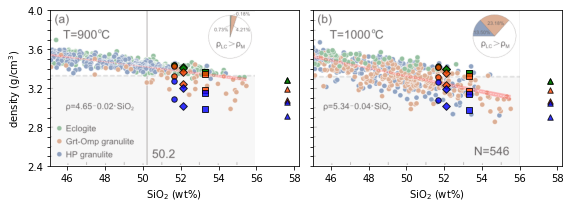

In [2]:
import sys,os
sys.path.append(os.path.join(os.path.pardir, 'tcg_slb_database','python'))
import numpy as np
import matplotlib.pyplot as plt
from tcg_slb.phasediagram.scipy import ScipyPDReactiveODE
from tcg_slb.phasediagram.base import GPa2Bar
from python.tcg import x2c,phi2F,get_reaction,composition_to_label, custom_solve
from python.perplex import ppx_point_composition, ppx_profile_data

eps = 1.e-5 # default, 1.e-2

img_a = plt.imread("figs/li2022_8a.png")
img_b = plt.imread("figs/li2022_8b.png")

fig = plt.figure(figsize=(8,3))

ax1 = plt.subplot(1,2,1)
plt.imshow(img_a, extent=[45.1, 55.9, 2.41, 3.99], aspect='auto', zorder=-1, alpha=0.6)

ax2 = plt.subplot(1,2,2)
plt.imshow(img_b, extent=[45.05, 55.975, 2.41, 3.99], aspect='auto', zorder=-1, alpha=0.6)

rxn = get_reaction("eclogitization_2024_slb21_rx")
Tr = 5500.+273.15 
rxn.set_parameter("T0", Tr)

# name, sio2 wt%, marker type
comps = [
    ("mackwell_1998_maryland_diabase", 51.66,'o'), 
    ("hacker_2015_md_xenolith",52.1,'D'), 
    ("sammon_2021_lower_crust",53.3,'s'), 
    ("sammon_2021_deep_crust", 57.6,'^')
]


for composition, sio2, marker in comps:
    print(composition)
    Fi0, Xik0, phii0, cik0 = ppx_point_composition(rxn, composition)
    cik0 = x2c(rxn, Xik0) if cik0 is None else cik0
    Fi0 = phi2F(rxn, phii0, cik0, eps) if Fi0 is None else Fi0

    ode = ScipyPDReactiveODE(rxn)

    facies = [
        (900., 2.25e4, 'green'), # eclogite
        (900., 2.0e4, 'green'), # eclogite
        (900., 1.75e4, 'orangered'), # grt-omp granulite
        (900., 1.5e4, 'orangered'), # grt-omp granulite
        (900., 1.25e4, 'blue'), # granulite
        (900., 1.0e4, 'blue'), # granulite
    ]

    for T, P, color in facies:

        # equilibrate at given facies
        ode.solve(T+273.15,P,Fi0,cik0,1,Da=1e6)

        # set ambient P,T
        ode.p = 21e3 # bar
        ode.T = 900.0+273.15
        rho1 = ode.final_rho()
        ax1.scatter(sio2,rho1/10.,30,color,marker,alpha=0.8,edgecolor='black')

        ode.T = 1000.0+273.15
        rho2 = ode.final_rho()
        ax2.scatter(sio2,rho2/10.,30,color,marker,alpha=0.8,edgecolor='black')

ax1.set_xlabel("SiO$_2$ (wt%)")
ax2.set_xlabel("SiO$_2$ (wt%)")
ax1.set_ylabel("density (g/cm$^3$)")
ax1.set_yticks(np.arange(2.4,4.1,step=0.1))
ax2.set_yticks(np.arange(2.4,4.1,step=0.1))
ax1.set_yticklabels(["2.4","","","","2.8","","","","3.2","","","","3.6","","","","4.0"])
ax2.set_yticklabels([])
plt.tight_layout()
plt.savefig("output/density_vs_xenoliths.png")
